In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df["Price"] = housing.target
print(housing_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


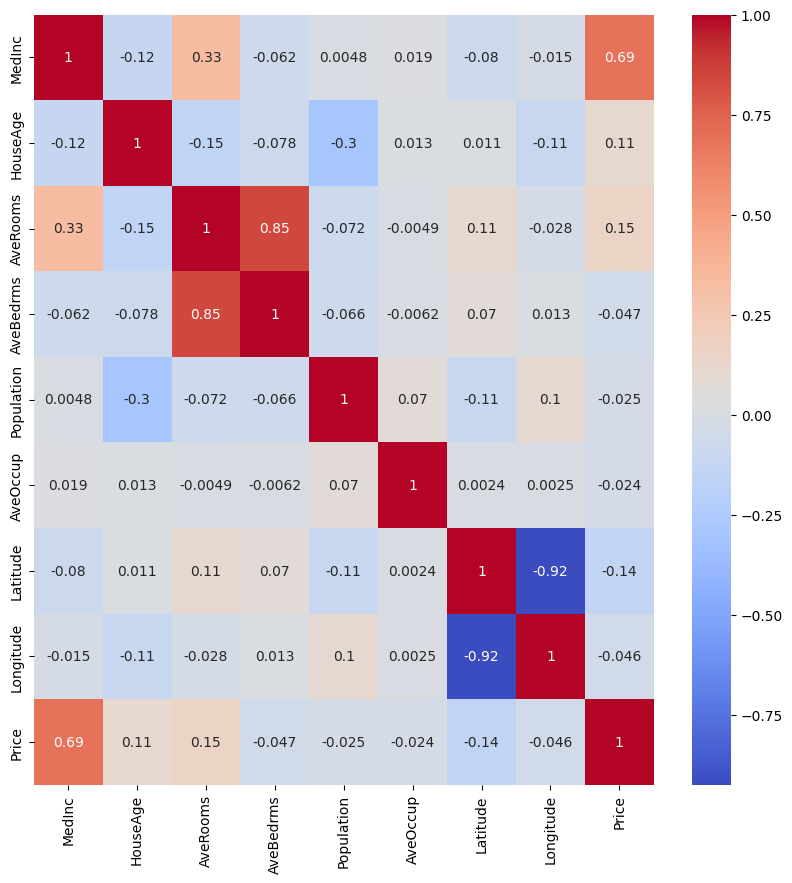

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = housing_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm")
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_df_scaled = pd.DataFrame(scaler.fit_transform(housing_df.drop(columns=["Price"])))
print(housing_df_scaled)

              0         1         2         3         4         5         6  \
0      2.344766  0.982143  0.628559 -0.153758 -0.974429 -0.049597  1.052548   
1      2.332238 -0.607019  0.327041 -0.263336  0.861439 -0.092512  1.043185   
2      1.782699  1.856182  1.155620 -0.049016 -0.820777 -0.025843  1.038503   
3      0.932968  1.856182  0.156966 -0.049833 -0.766028 -0.050329  1.038503   
4     -0.012881  1.856182  0.344711 -0.032906 -0.759847 -0.085616  1.038503   
...         ...       ...       ...       ...       ...       ...       ...   
20635 -1.216128 -0.289187 -0.155023  0.077354 -0.512592 -0.049110  1.801647   
20636 -0.691593 -0.845393  0.276881  0.462365 -0.944405  0.005021  1.806329   
20637 -1.142593 -0.924851 -0.090318  0.049414 -0.369537 -0.071735  1.778237   
20638 -1.054583 -0.845393 -0.040211  0.158778 -0.604429 -0.091225  1.778237   
20639 -0.780129 -1.004309 -0.070443  0.138403 -0.033977 -0.043682  1.750146   

              7  
0     -1.327835  
1     -1.322844

In [32]:
from sklearn.model_selection import train_test_split

X=housing_df_scaled
Y=housing_df["Price"]

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
Y_pred = model.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,Y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

MAE: 0.5332001304956565
MSE: 0.5558915986952441
RMSE: 0.7455813830127762
R²: 0.575787706032451
Coefficients:  [ 0.85238169  0.12238224 -0.30511591  0.37113188 -0.00229841 -0.03662363
 -0.89663505 -0.86892682]
Intercept:  2.067862309508389


ValueError: x and y must be the same size

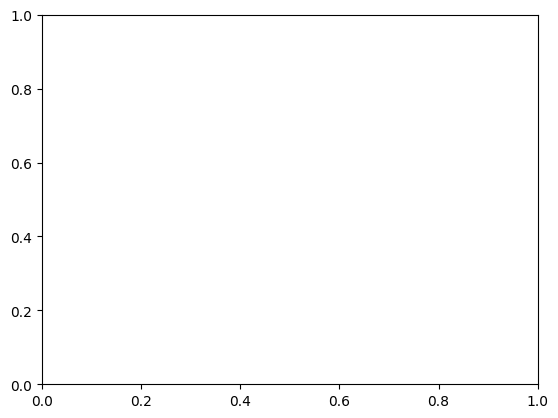

In [37]:
plt.figure()
plt.scatter(X_test,Y_test,color='blue',label='Actual Prices')
plt.scatter(X_test,Y_pred,color='red',lavel='Predicted Prices')

plt.plot(X_test,Y_pred,color='green',linewidth=2,label='Regression Line')

plt.title